In [25]:
# Ejemplo de lo que haría una neurona
import numpy as np
# definimos funcion de activación
def stepFunc(s, theta=1):
    m = s.size
    pred = np.zeros(m)
    for i in range (m):
        if s> theta:
            pred[i] = 1.
        if s <= theta:
            pred[i] = 0.
    return pred
# definimos otro ejemplo de función de activación
def hypertan(s=0.0):
    return np.tanh(s)

def perceptron(func,W,X):
    s= np.sum(W*X) # W*X multiplica elemento a elemento los vectores = w1*x1+w2*x2
    pred = func(s)
    return pred


In [26]:
x1 = 0.9
x2 = 2.3
X=[x1,x2]
X = np.column_stack((x1,x2))
w1=1
w2=1
W =[w1,w2]
pred = perceptron(stepFunc,W,X) # escojo función de activación
pred

array([1.])

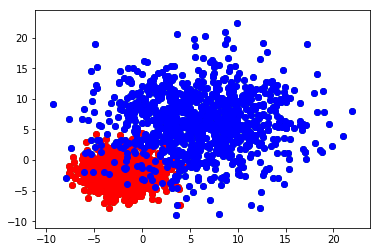

In [54]:
data=np.loadtxt('ClassificationExample.txt')
X=data[:,1:]
y=data[:,0]
import matplotlib.pyplot as plt
colors = ['red', 'blue']
plt.scatter(X[:,0], X[:,1], c='g')
plt.scatter(X[y>0,0], X[y>0,1], c=colors[0])
plt.scatter(X[y==0,0], X[y==0,1], c=colors[1])
plt.show()

In [56]:
ntrain=3*len(y)/4
X_train=X[:ntrain,:];y_train=y[:ntrain]
X_test=X[ntrain:,:];y_test=y[ntrain:]
print (np.shape(X_train)),(np.shape(y_train))
print (np.shape(X_test)),(np.shape(y_test))


(1500, 2) (1500,)
(500, 2) (500,)


In [57]:
from sklearn.neural_network import MLPClassifier
help (MLPClassifier)


Help on class MLPClassifier in module sklearn.neural_network.multilayer_perceptron:

class MLPClassifier(BaseMultilayerPerceptron, sklearn.base.ClassifierMixin)
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear u

In [78]:
# definimos numero de capas y de hidden nodes, función de activación
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),activation='relu',max_iter=500) # batch_size default depending on minimizer

In [79]:
# Entreno con los valores que tengo en el train
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Text(0,0.5,'loss function')

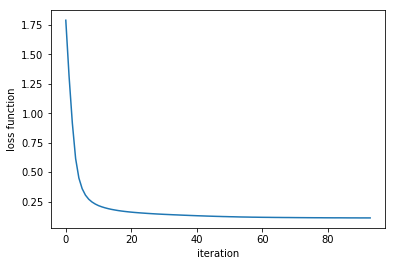

In [80]:
import matplotlib.pyplot as pl
pl.plot(mlp.loss_curve_)  # mlp.loss_curve nos da una idea de como converge el training set
pl.xlabel('iteration')
pl.ylabel('loss function')





In [81]:
from sklearn.metrics import confusion_matrix
predictions = mlp.predict(X_test)
# print predictions
confusion_matrix(y_test,predictions)  # C_ii true positives, C_ij!=0 false positves

array([[222,  15],
       [  4, 259]])

In [82]:
from sklearn.metrics import classification_report
print classification_report(y_test,predictions)

             precision    recall  f1-score   support

        0.0       0.98      0.94      0.96       237
        1.0       0.95      0.98      0.96       263

avg / total       0.96      0.96      0.96       500



Este resultado indica que :
Clase 1 --> todos los elementos de la clase 1 han sido identificados correctamente y que además no hay falsas detecciones en esta clase.

Clase 2--> el 10% de los objetos que la red clasifica en la clase 2 son falsas detecciones, mientras que los objetos que realmente son de la clase 2 están todos correctamente clasificados. 

Clase 3--> En el caso 3 todas las que la red ha clasificado como clase 3 son de la clase 3, pero faltan por clasificar el 18%



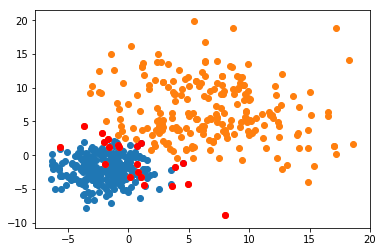

In [72]:
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1])
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1])
plt.scatter(X_test[(y_test==1)&(predictions==0),0],X_test[(y_test==1)&(predictions==0),1],c='r')
plt.scatter(X_test[(y_test==0)&(predictions==1),0],X_test[(y_test==0)&(predictions==1),1],c='r')
# missclassified in red